* This notebook was made to look at:
1) Total CTD casts carried out by IOS.
2) How seasonally they are distributed?
3) The location?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
import datetime

import pandas as pd
import netCDF4 as nc
import datetime
import pandas as pd
import seaborn as sns
#from salishsea_tools.nowcast import figures
from salishsea_tools import viz_tools, nc_tools, tidetools
from glob import glob
import ACTDR
#from datetime import datetime
%matplotlib inline

In [2]:
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '35'}
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '40', 'color': 'black',
    'weight': 'medium'

}

In [3]:
##recent
ACTDR.load_dat('/data/jieliu/MEOPAR/IOS/SOG_2000.dat')

> open  /data/jieliu/MEOPAR/IOS/SOG_2000.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  /data/jieliu/MEOPAR/IOS/SOG_2000.dat
> complete


In [4]:
## previous
ACTDR.load_dat('SOG.dat')

> open  SOG.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  SOG.dat
> complete


In [5]:
len(ACTDR.CTD_DAT)

3119

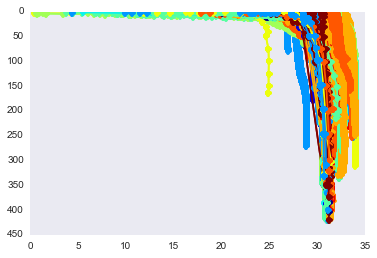

In [6]:
cmap=cm.get_cmap('jet',12)
count=0
for cast in ACTDR.CTD_DAT:
    plt.plot(cast['Salinity'],cast['Depth'],marker='o',c=cmap(cast['Month']-1))
    count=count+1
plt.axis([0,35,450,0])
plt.grid()

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


(47.5, 50.3)

/home/jieliu/anaconda3/envs/mypython2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


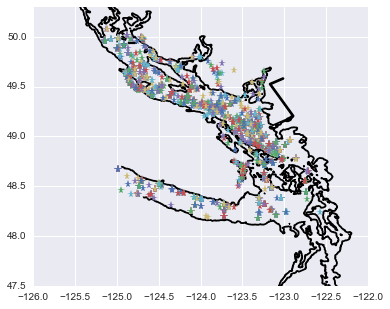

In [7]:
fig, ax = plt.subplots(1,1,figsize = (6,5))
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
casts = []
for cast in ACTDR.CTD_DAT:
    year = cast['Year']
    plt.plot(cast['Longitude'], cast['Latitude'], '*', markersize = 8)
        #casts.append(cast['Year'])
#max(casts)
ax.set_xlim([-126.,-122.])
ax.set_ylim([47.5,50.3])

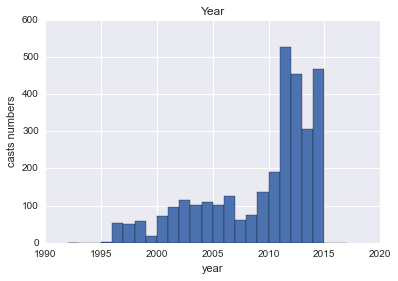

In [8]:
data = pd.DataFrame(ACTDR.CTD_DAT)

max_year = data['Year'].max()
min_year = data['Year'].min()
data.hist('Year', bins = range(min_year - 3, max_year + 4))
plt.ylabel('casts numbers')
plt.xlabel('year')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)

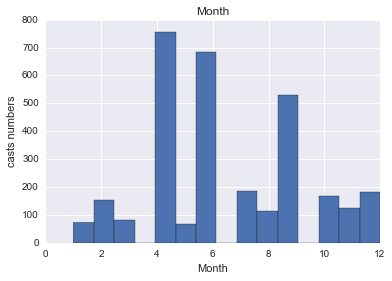

In [9]:
data.hist('Month',bins = 15)
plt.ylabel('casts numbers')
plt.xlabel('Month')
ax=plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)